

* Läs mer om RFF
* Fundera på hur man kan anpassa RFF till PINN-formuleringen
* Skriv lite kod i jax (jag skickar länk till dokumentation) som implementerar gradientstegning för 1 lagers NN med exp(1j * x) - aktivering
* Testa på ett enkelt exempel, tex. exp(sin(t))


In [4]:
import jax
from jax import grad, jit, vmap
import jax.numpy as jnp

import matplotlib.pyplot as plt

t = jnp.linspace(0, 1, 100)
f = lambda t: jnp.max(jnp.array([0.5, t]))
f_vec = vmap(f)

w = jnp.array([1., 2])
c = jnp.array([0, 1.])

param = (w, c)
def model(param, x): # x är en skalär
    w, c = param
    return jnp.dot(jnp.exp(1j * w * x), c).real

@jit
def loss(param, x, y):
    return jnp.mean((model_vec(param, x) - y)**2)

model_vec = vmap(model, in_axes=(None, 0))

for i in range(1000):
    (w_grad, c_grad) = grad(loss, argnums=0)(param, t, f_vec(t))
    w = w - 0.1 * w_grad
    c = c - 0.1 * c_grad
    param = (w, c)


/home/emastr/anaconda3/envs/jax/lib/python3.12/site-packages/jax/_src/lax/lax.py:2745: ComplexWarning: Casting complex values to real discards the imaginary part
  x_bar = _convert_element_type(x_bar, x.aval.dtype, x.aval.weak_type)


0.0017128733


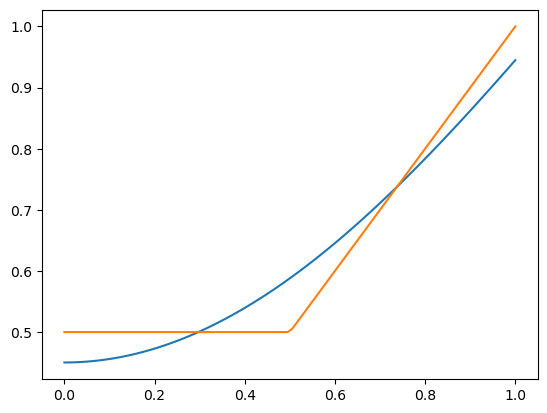

In [5]:

plt.plot(t, model_vec(param, t))
plt.plot(t, f_vec(t))
print(loss(param, t, f_vec(t)))



In [2]:
import numpy as np


def layer1(x, w):
    return np.dot(x, w)


def activation(x_dot_w):
    return np.exp(1j * x_dot_w)


def layer2(exp_x_dot_w, c):
    return np.dot(exp_x_dot_w, c) # <- c1 * exp(1j * dot(w1, x)) + c2 * exp(1j *dot(w2, x)) + ... + cn * exp(1j * dot(wn, x))



def fourier_series(x, w, c):
    return layer2(activation(layer1(x, w)), c)



def loss(w, c, x, y):
    return np.mean((fourier_series(x, w, c) - y) ** 2)
    # norm( Ac  - y) -> c = (A^T A)^-1 * A^T y , A_ij(w) = exp(1j * wi * xj) -> c(w)
    # strategi: börja med slumpa w,  bestäm c(w), bestäm w(c), loopa 
    # w(c1) <- steg 1,  w(c2) <- steg 2,  fördelningen p(w(cn)=l) följer sannolikhetsfördelning, konvergerar då n-> inf
    # p(w) proportionell mot fouriertransformen av y(x)



